## 4.9: Intro to Data Visualization with Python

### **Exercise**
#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set display options for better viewing

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  # Limit columns
pd.set_option('display.max_rows', 50)      # Limit rows

In [3]:
# Creating shortcut for data file

path = r'/Users/anjanpakhrin/Documents/Instacart Basket Analysis/'

In [4]:
# Create path to data file --> DataFrame was named after chapter number: "ords_prods_merge_4-7.pkl"

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4-7.pkl'))

In [5]:
# Cheking output

ords_prods_merge.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders


In [6]:
# Checking descirptive statistics for "prices" to confirm that the dataframe is free from outliers
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956429e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### **Creating Bar Charts**

<Axes: xlabel='order_day_of_week'>

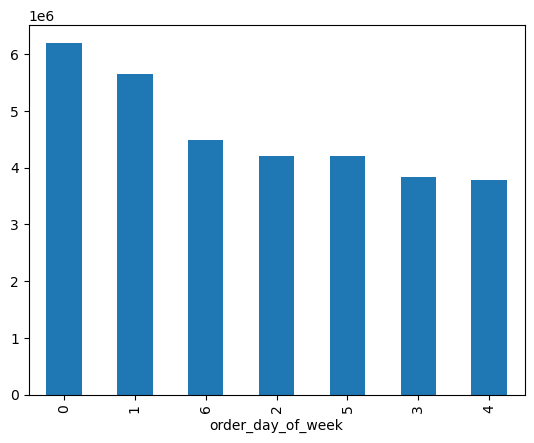

In [7]:
# Create Bar Chart for "order_day_of_week"

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

##### Sorting the bars

<Axes: xlabel='order_day_of_week'>

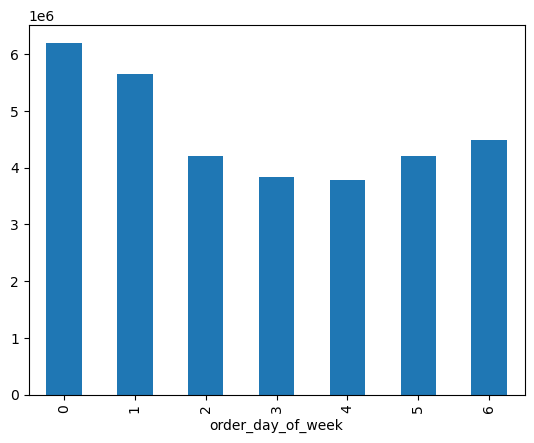

In [8]:
# Sorting the bars according to the index

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

##### Comparing with number values

In [9]:
# Checking frequencies in numbers

ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

##### Filling the bars with color

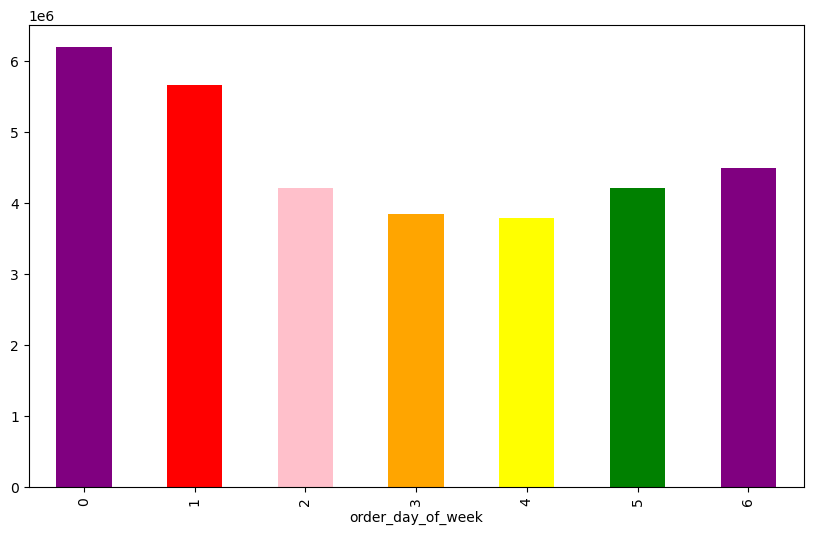

In [10]:
# Filling color

bar_chart = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'],
    figsize = (10, 6)
)

##### Adding labels

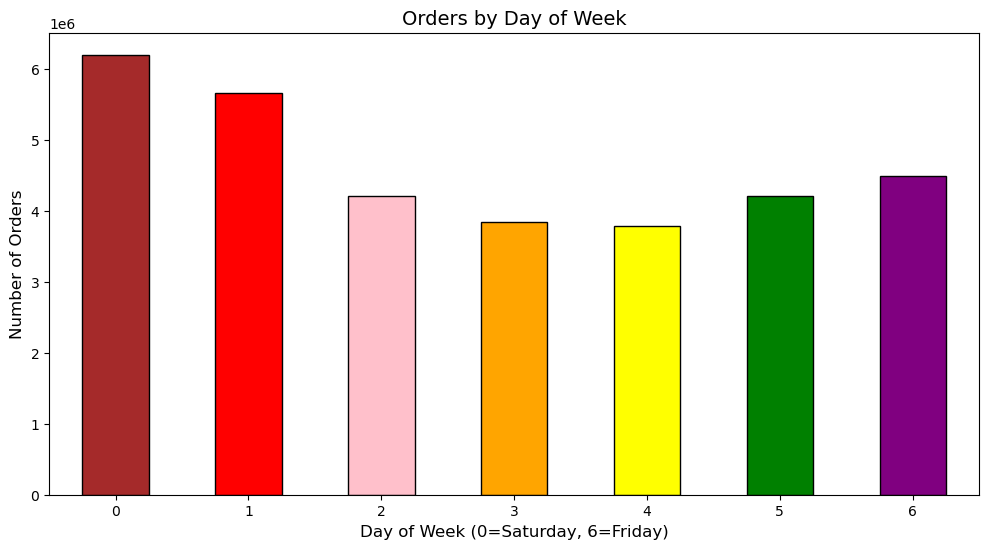

In [11]:
# Creating bar chart
bar_chart = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['brown', 'red', 'pink', 'orange', 'yellow', 'green', 'purple'],
    edgecolor = 'black',
    figsize = (12, 6)
)

# Adding labels for axes and the title
bar_chart.set_xlabel('Day of Week (0=Saturday, 6=Friday)', fontsize=12)
bar_chart.set_ylabel('Number of Orders', fontsize=12)
bar_chart.set_title('Orders by Day of Week', fontsize=14)

# Rotating x-axis labels --> to display horizontal
plt.xticks(rotation=0)
plt.show()

#### Exporting Charts

In [12]:
# Exporting bar chart

bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_dow.png'))

### **Creating Histograms and Scatterplots**

#### **Histograms**

<Axes: ylabel='Frequency'>

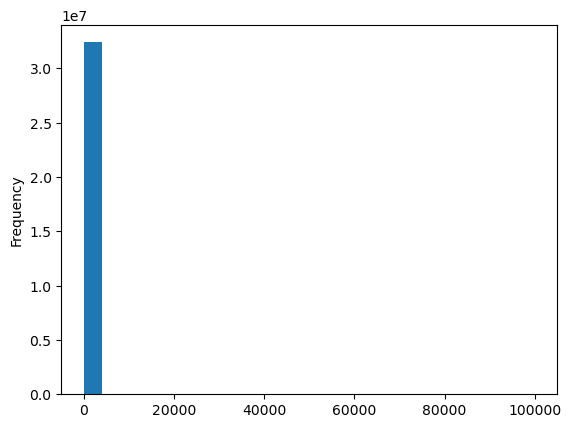

In [13]:
# Creating Histograms for "prices"

ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# Checking descriptive statistics for "prices"

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956429e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
# Mean value for "prices"
float(ords_prods_merge['prices'].mean())

11.980225563049316

In [16]:
# Median for "prices"
float(ords_prods_merge['prices'].median())

7.400000095367432

In [17]:
# Max for "prices"
float(ords_prods_merge['prices'].max())

99999.0

#### **Scatterplot**

<Axes: xlabel='prices', ylabel='prices'>

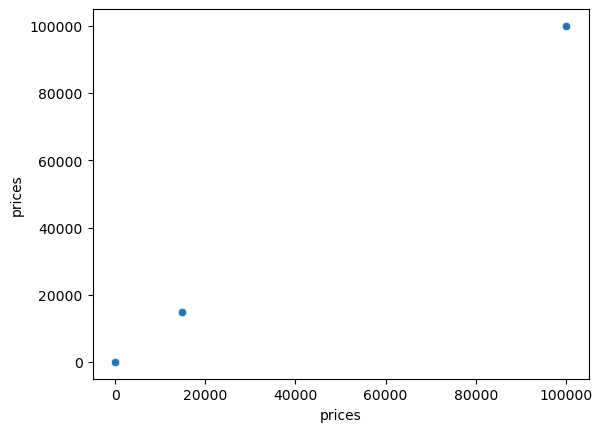

In [18]:
# Creating Scatterplots "prices vs. prices"

sns.scatterplot(x= 'prices', y = 'prices', data = ords_prods_merge)

#### Analysis:
* Two data points are far beyond the expected values - values close to 20,000 and 100,000. The close value to this 100,000 value is max value 99,999 for price as seen in above steps. Which might be an extreme outlier.
* Hence the values close to 20,000 might not necessarily be a outlier. To check this, can be a few exploratory chechks could to be done. To this purpose a threshold for prices can be defined assuming that an item in a supermarket would cost in average $100.
* Anything above this threshold could be considered as an outlier.

In [19]:
# Running the threshold check - Outlier observation

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
1576,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders
1638,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders
16522,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Average orders
16528,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Busiest days,Average orders
53672,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Most orders
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Least busy,Slowest days,Fewest orders
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Average orders


#### **Observations:**
* There are 5,127 rows with outlier observations (prices > `$100`).
* Prices like `$14,900.00` or `$99,9999` per item don't make sense in terms of the other values in column.
* Values > 100, therefore, defined as outliers and marked as missing (NaN).
#### Turning values > 100 into NaNs

In [20]:
# Turning outliers into NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [21]:
# Checking max value

ords_prods_merge['prices'].max()

25.0

In [22]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.100926e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

- **Now the maximum value of `$25` appears more reasonable.**  
- **Logically, a `$25` grocery item is far more plausible than items priced at `$14,900` or `$99,999`.**

#### **Histogram with cleaned data** - after filtering **outliers**

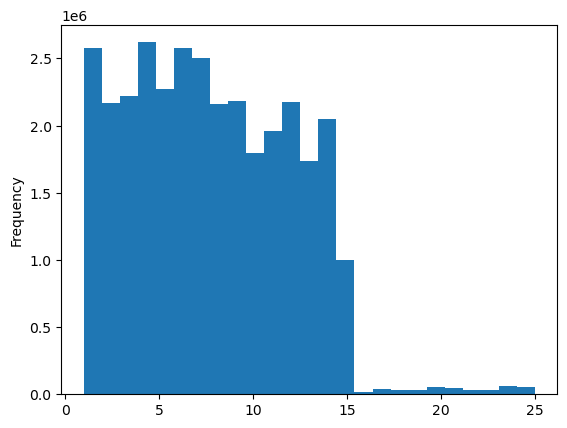

In [23]:
# Creating Histograms for "prices"

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

* Most products fall between `$1`and `$15`, while a few are higher priced at `$15` and `$25`.

<function matplotlib.pyplot.show(close=None, block=None)>

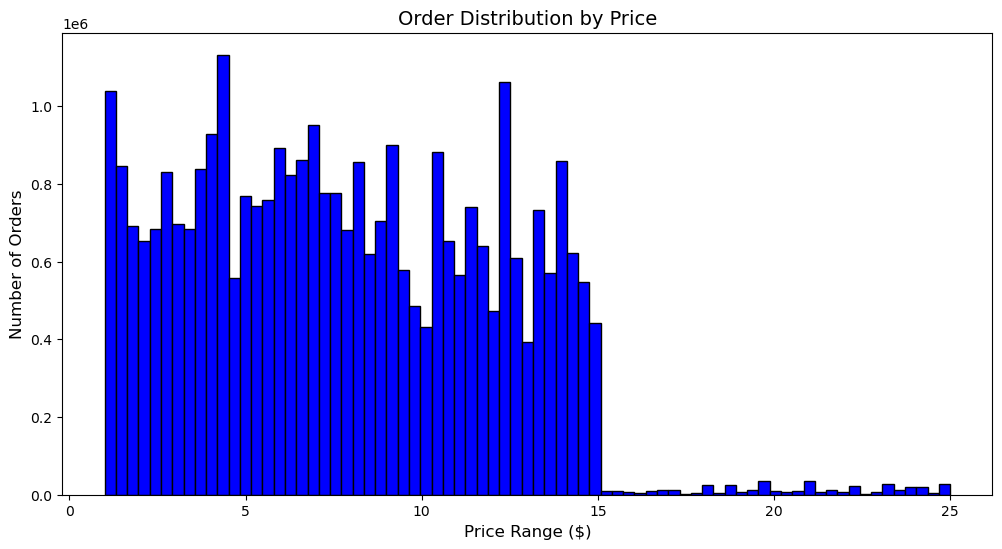

In [24]:
# Histogram with increases granularity --> increasing number of bins from 25 to 75

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 75,
                                              edgecolor = 'black',
                                              color = 'blue',
                                              figsize = (12, 6)
)
# Adding labels
plt.title('Order Distribution by Price', fontsize=14)
plt.xlabel('Price Range ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show

#### Exporting Histogram

In [25]:
# Exporting Histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### **Creating Line Charts**
* **Line charts** show the trending or changes over time.
* High computing issue may occur due to massive data volumne
* **Subsetting** doesn't capture full population characteristics creating biased and inaccurate visualization.

+ Therefore, **Sampling** is the proper method for large datasets.

**Must use statistical sampling instead of simple subsetting for accurate, manageable analysis of large subsets.**

#### **Sampling Data**
* Create random sample, a representative subsection of entire dataset.
* Using machine learning approach **(e.g., 80/20 split)**: use 80 percent of a data to train the algorithm and the reamining 20 percent to check the accuracy of the model.

In [26]:
# Splitting dataframe into 70/30 ration - generating random split

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True], shape=(32404859,))

##### - Splitting dataframe

In [28]:
# Store 70 percent of the sample dataframe big

big = ords_prods_merge[dev]

In [29]:
# Store 30 percent of the sample dataframe small
small = ords_prods_merge[~dev]

##### - Verifying the splitting
* len(ords_prods_merge) = len(big) + len(small)

In [30]:
len(ords_prods_merge)

32404859

In [31]:
len(big) + len(small)

32404859

##### - Reducing samples to only necessary columns for the **line chart**, namely "prices" and "order_day_of_week"

In [32]:
# Reducing the sample to only necessary variables
df_2 = small[['order_day_of_week', 'prices']]

##### - Creating line chart

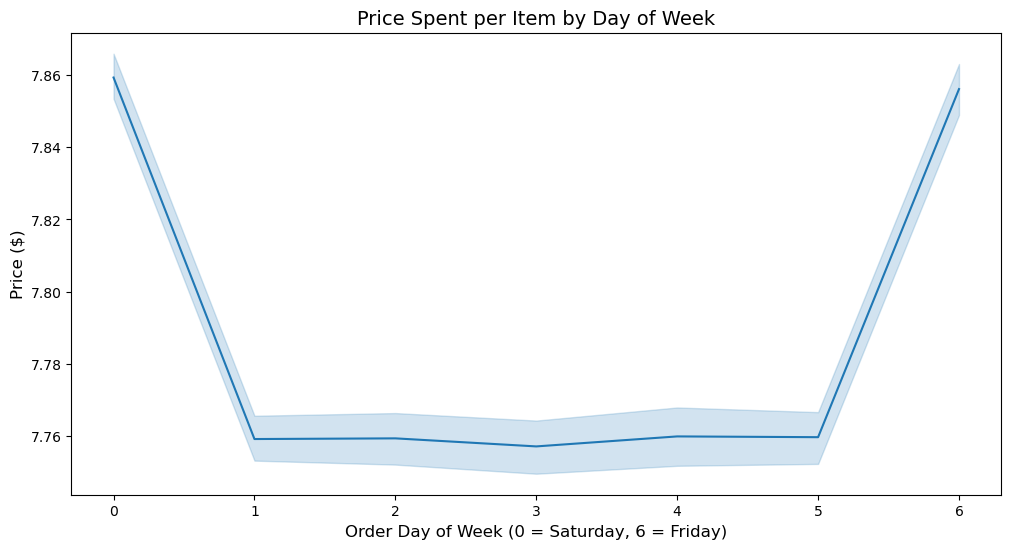

In [33]:
# Creating line chart for small sample
line = plt.figure(figsize=(12, 6))
sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

# Adding labels
plt.title('Price Spent per Item by Day of Week', fontsize=14)
plt.xlabel('Order Day of Week (0 = Saturday, 6 = Friday)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

In [34]:
# Exporting Line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))

* Line chart shows that the most money is spent on Friday (6) and Saturday (0).
* Translucent blue band around line is called **error band** and represents chart's confidence intervals.
* In other words, the wider the blue band, the less certain the prediction is. A narrow band means the prediction is very confident.
##### Creating line chart for big sample
* Due to hardware limitations, generating a line chart with the full dataset on a machine equipped with less than 16 GB of RAM may not be feasible. Nevertheless, the proposed method can be considered highly reliable, as its accuracy can be validated by constructing a line chart using a smaller subsample (30% of the data), which effectively represents the trends of the larger dataset (70%).